# **Kaggle Titanic Submission**

## *Workflow*

1. EDA (Explanatary Data Anlysis)
2. Preprocessing Data
3. Modelling

**1. EDA (Explanatory Data Analysis)**
- Research Data
- Understanding Data
- Check Data Properties
- Separate Variable
- Check Missing Value
- Visualization Simple Plot

**2. Preprocessing Data**
- Fill/Drop Missing Value
- Convert Categorical Data to Numerical Data
- Selected Variable

**3. Modelling**
- Choose the Model
- Choose Parameter
- Doing Modelling
- Chech Accuracy Model

In [2]:
import pandas as pd
import numpy as np

In [3]:
train = pd.read_csv('/workspaces/codespaces-jupyter/data/train.csv')

test = pd.read_csv('/workspaces/codespaces-jupyter/data/test.csv')

## **1. EDA (Explanatory Data Analysis)**

#### **Research Data**

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
print(f'{train.isnull().sum()}')

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
print(f'{train.isna().sum()}')

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


#### **Data Visualization**

##### **Simple Barchart**

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
def bar_chart(column):
    count = train[column].value_counts()

    index = count.index
    values = count.values

    fig = plt.figure(figsize=(7,6))
    plt.bar(index, values, color="blue", width=0.5)

    plt.show()

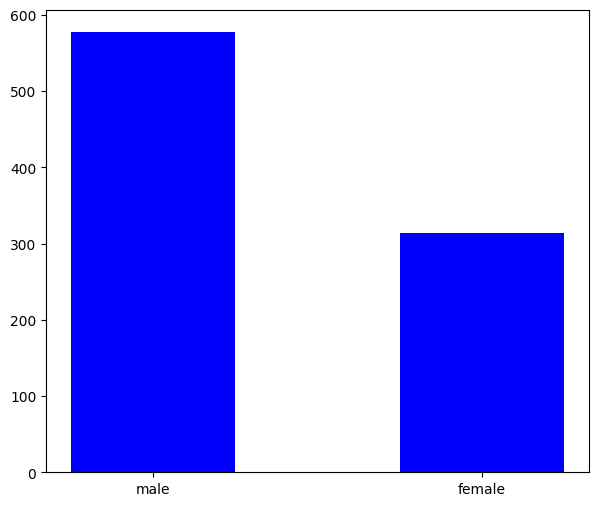

In [12]:
bar_chart("Sex")

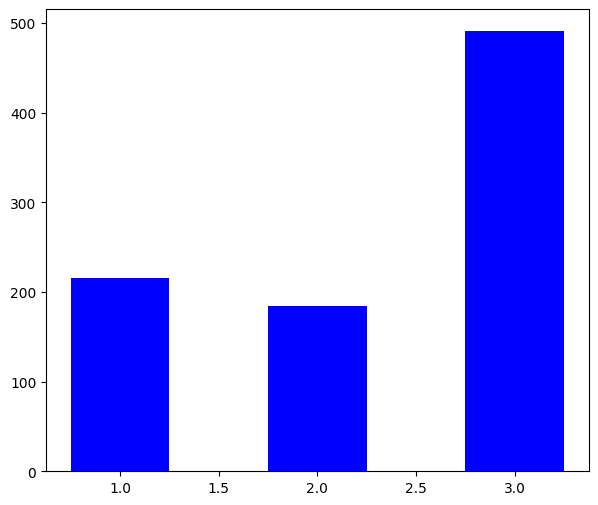

In [13]:
bar_chart("Pclass")

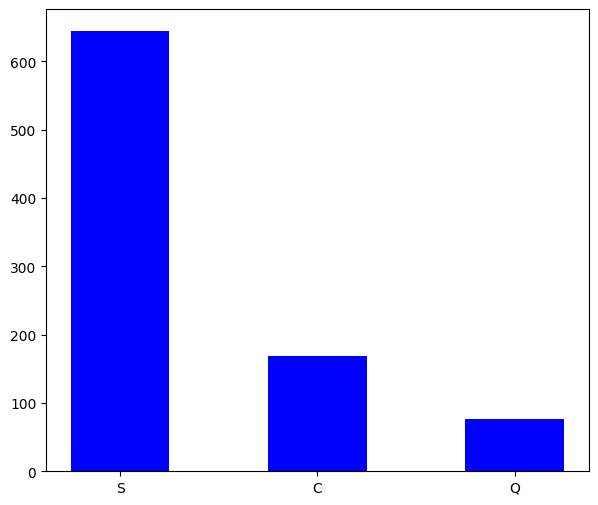

In [14]:
bar_chart("Embarked")

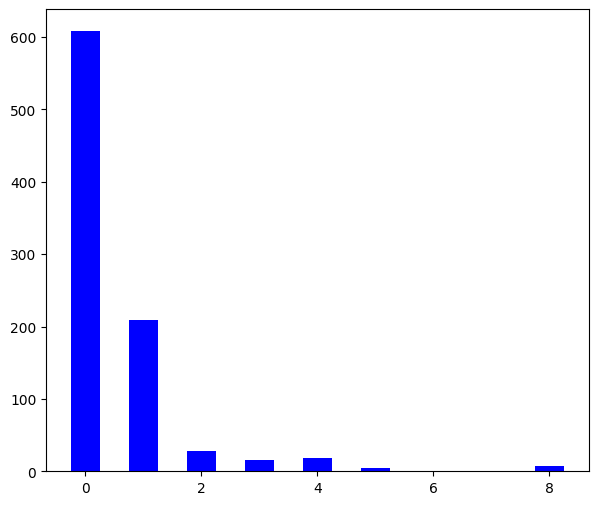

In [15]:
bar_chart("SibSp")

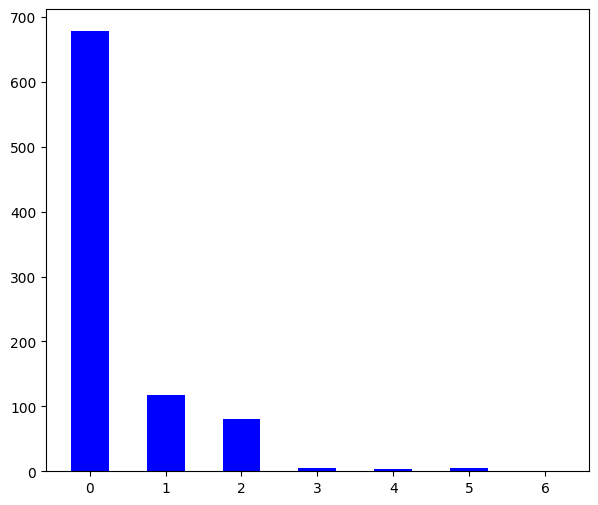

In [16]:
bar_chart("Parch")

#### **Grouped Barchart / Clustered Barchart**

In [17]:
survived = train.groupby(['Survived', 'Sex']).count()['PassengerId'].reset_index()
survived

,Survived,Sex,PassengerId
0,0,female,81
1,0,male,468
2,1,female,233
3,1,male,109


In [18]:
def grouped_bar(column):
    survived = train.groupby(['Survived', column]).count()['PassengerId'].reset_index()

    g = sns.catplot(
        data = survived, kind='bar',
        x = 'Survived', y='PassengerId', hue=column,
        palette = 'dark', height=6
    )

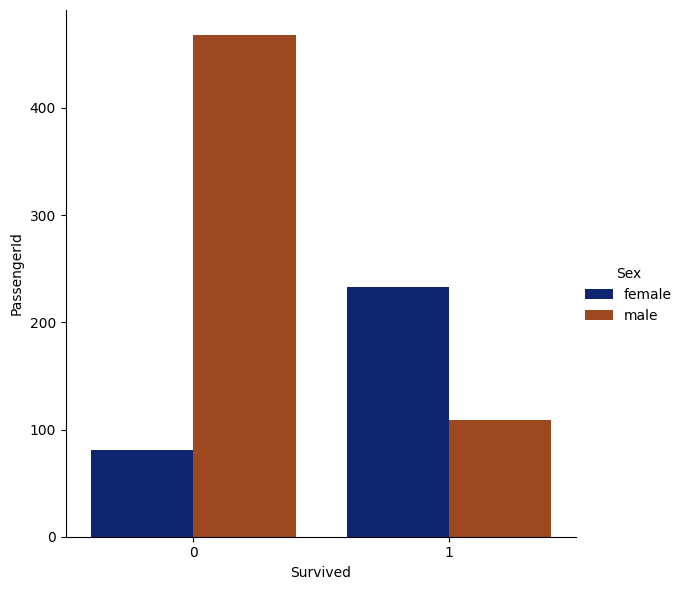

In [19]:
grouped_bar('Sex')

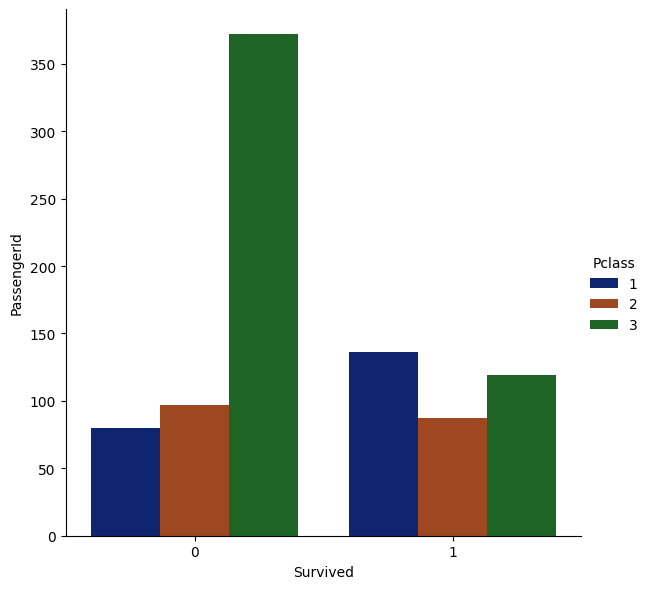

In [20]:
grouped_bar('Pclass')

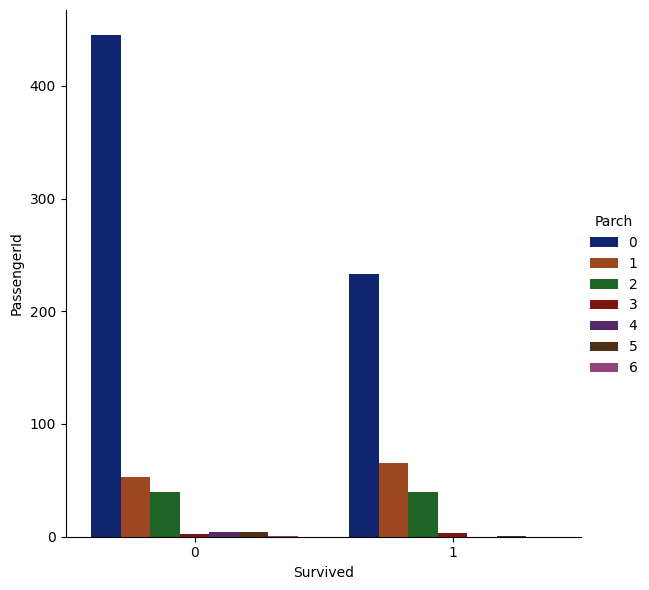

In [21]:
grouped_bar('Parch')

#### **Histogram**

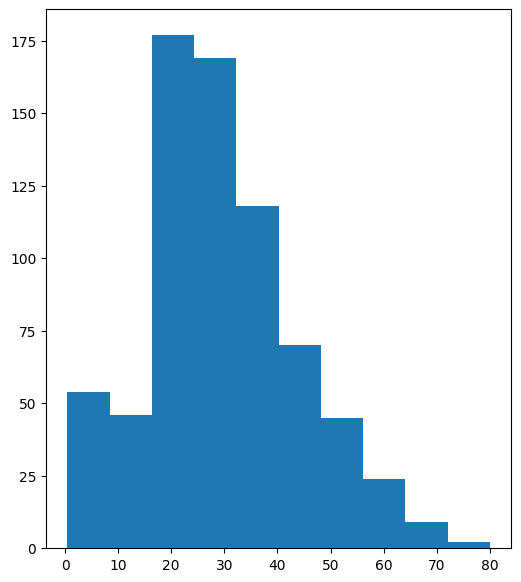

In [22]:
fig, ax = plt.subplots(figsize=(6,7))
ax.hist(train.Age)
plt.show()

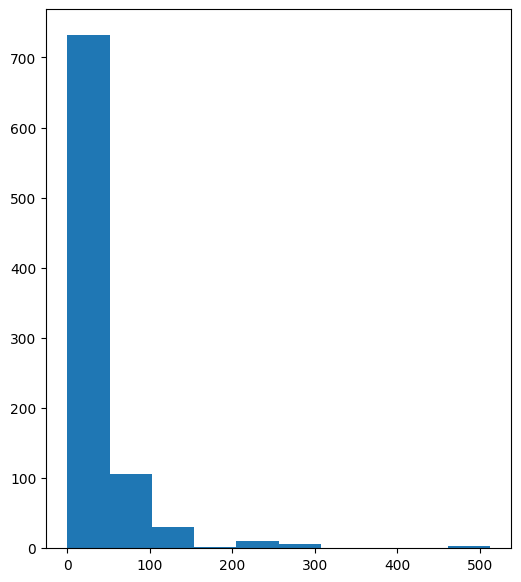

In [23]:
fig, ax = plt.subplots(figsize=(6,7))
ax.hist(train.Fare)
plt.show()

#### **KDE Plot**

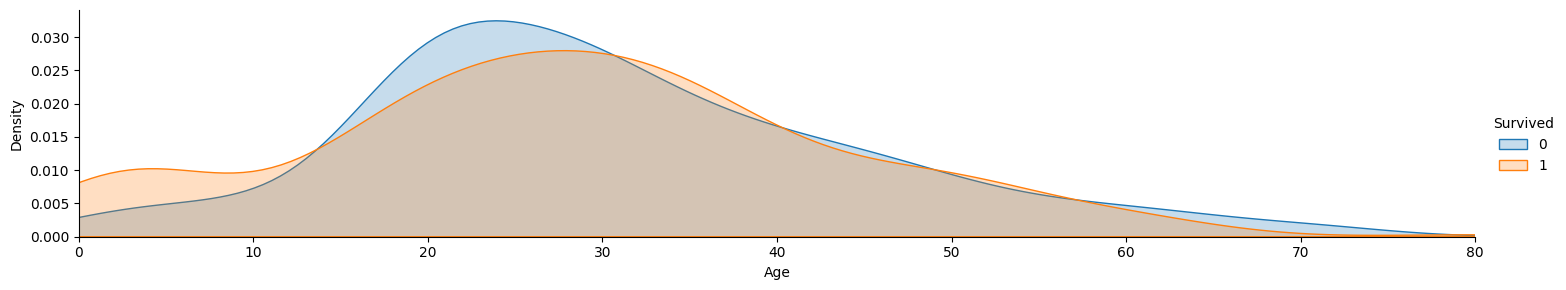

In [24]:
facet = sns.FacetGrid(train, hue="Survived", aspect=5)
facet.map(sns.kdeplot,'Age',fill=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.show()

## **2. Preprocessing Data**

In [25]:
train.shape, test.shape

((891, 12), (418, 11))

In [26]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### **Missing Value Data Embarked**

In [28]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [29]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [30]:
mode_embarked = train['Embarked'].mode()[0]
mode_embarked

'S'

In [31]:
train['Embarked'] = train['Embarked'].fillna(mode_embarked)
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [32]:
train[train['Embarked'].index == 829]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S


#### **Missing Value Data Age**

In [33]:
mean_age = train['Age'].mean()
mean_age

29.69911764705882

In [34]:
train['Age'] = train['Age'].fillna(mean_age)

In [35]:
mean_age_test = test['Age'].mean()
mean_age_test

30.272590361445783

In [36]:
test['Age'] = test['Age'].fillna(mean_age_test)

#### **Missing Value Fare Data**

In [37]:
mean_fare_test = test['Fare'].mean()
mean_fare_test

35.627188489208635

In [38]:
test['Fare'] = test['Fare'].fillna(mean_fare_test)

#### **Drop Cabin Data because too many Missing Value**

In [39]:
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)

In [40]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [41]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### **Convert Data to Numerical**

In [42]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [43]:
sex_map = {'male' : 0, 'female' : 1}

train['Sex'] = train['Sex'].map(sex_map)
test['Sex'] = test['Sex'].map(sex_map)

In [44]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


#### **Convert Embarked**

In [45]:
embarked = train[['Embarked']]

dummies = pd.get_dummies(embarked)
dummies.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [46]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


In [47]:
train = pd.merge(train.reset_index(), dummies.reset_index())
train.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,0,0,1
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,1,0,0
2,2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,0,0,1
4,4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,0,0,1


In [48]:
train = train.drop(['index', 'Embarked'], axis=1)

In [49]:
embarked_test = test[['Embarked']]

dummies_test = pd.get_dummies(embarked_test)

In [50]:
test = pd.merge(test.reset_index(), dummies_test.reset_index())
test = test.drop(['index', 'Embarked'], axis=1)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,0,1,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0,0,1


#### **Extract Title from Name**

In [57]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)

In [58]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,0,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,1,Mr


In [59]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

train['Title'] = train['Title'].map(title_mapping)

In [60]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,0,0,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,0,1,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,1,0


In [61]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
Title          0
dtype: int64

In [62]:
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,0,1,0,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0,0,1,Mrs
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,0,1,0,Mr
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0,0,1,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0,0,1,Mrs


In [63]:
test['Title'] = test['Title'].map(title_mapping)

In [64]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0,0,1,2
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,0,1,0,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0,0,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0,0,1,2


In [65]:
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
Title          0
dtype: int64

#### **Selected Column**

In [66]:
train.shape, test.shape

((891, 14), (418, 13))

In [67]:
train = train.drop(["PassengerId", "Name", "Ticket"], axis=1)
test = test.drop(["PassengerId", "Name", "Ticket"], axis=1)

In [68]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,0,3,0,22.0,1,0,7.2500,0,0,1,0
1,1,1,1,38.0,1,0,71.2833,1,0,0,2
2,1,3,1,26.0,0,0,7.9250,0,0,1,1
3,1,1,1,35.0,1,0,53.1000,0,0,1,2
4,0,3,0,35.0,0,0,8.0500,0,0,1,0


In [69]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,3,0,34.5,0,0,7.8292,0,1,0,0
1,3,1,47.0,1,0,7.0000,0,0,1,2
2,2,0,62.0,0,0,9.6875,0,1,0,0
3,3,0,27.0,0,0,8.6625,0,0,1,0
4,3,1,22.0,1,1,12.2875,0,0,1,2


## 3. **Modelling**

#### using RandomForestClassifier to classification the data

In [70]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [71]:
train.shape, test.shape

((891, 11), (418, 10))

In [72]:
train_data = train.drop(["Survived"], axis=1)
target = train['Survived']

In [73]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)

clf = RandomForestClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.84444444 0.82022472 0.78651685 0.76404494 0.84269663 0.84269663
 0.78651685 0.83146067 0.82022472 0.87640449]


In [74]:
score.mean()

0.8215230961298376

#### **Prediction Using Artificial Neural Network**

In [75]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(train_data, target, test_size=0.3, random_state=0)

In [79]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(10, 1)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                176       
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 465
Trainable params: 465
Non-trainable params: 0
_________________________________________________________________


In [80]:
model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [81]:
model.fit(X_train, y_train, epochs=150, batch_size=1)

Epoch 1/150
623/623 [==============================] - 2s 1ms/step - loss: 0.8198 - accuracy: 0.6661
Epoch 2/150
623/623 [==============================] - 1s 1ms/step - loss: 0.6056 - accuracy: 0.7143
Epoch 3/150
623/623 [==============================] - 1s 1ms/step - loss: 0.6337 - accuracy: 0.7416
Epoch 4/150
623/623 [==============================] - 1s 1ms/step - loss: 0.5390 - accuracy: 0.7817
Epoch 5/150
623/623 [==============================] - 1s 1ms/step - loss: 0.5154 - accuracy: 0.7721
Epoch 6/150
623/623 [==============================] - 1s 1ms/step - loss: 0.5280 - accuracy: 0.7849
Epoch 7/150
623/623 [==============================] - 1s 1ms/step - loss: 0.5777 - accuracy: 0.7817
Epoch 8/150
623/623 [==============================] - 1s 1ms/step - loss: 0.5333 - accuracy: 0.7833
Epoch 9/150
623/623 [==============================] - 1s 1ms/step - loss: 0.5140 - accuracy: 0.8058
Epoch 10/150
623/623 [==============================] - 1s 1ms/step - loss: 0.4821 - accura

In [82]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy : {test_acc}')

9/9 [==============================] - 0s 2ms/step - loss: 0.5425 - accuracy: 0.8022
Test Accuracy : 0.8022388219833374


In [86]:
prediction = model.predict(test)

14/14 [==============================] - 0s 917us/step


In [87]:
prediction

array([[6.23119995e-02],
       [1.91073455e-02],
       [2.75843451e-03],
       [1.19884267e-01],
       [3.56731057e-01],
       [1.05034478e-01],
       [6.94695175e-01],
       [7.61154741e-02],
       [7.39625752e-01],
       [4.05506380e-02],
       [1.25939429e-01],
       [2.93626964e-01],
       [9.97901142e-01],
       [1.45035386e-01],
       [9.81837571e-01],
       [9.43859637e-01],
       [2.54801929e-01],
       [3.80378842e-01],
       [1.89926833e-01],
       [6.72596321e-02],
       [1.61036417e-01],
       [4.84957337e-01],
       [9.98219371e-01],
       [3.34175169e-01],
       [2.57262588e-01],
       [6.14356548e-02],
       [9.88703310e-01],
       [3.58566493e-01],
       [2.91563541e-01],
       [3.30103785e-01],
       [1.36514112e-01],
       [5.91840111e-02],
       [1.77074209e-01],
       [2.11411878e-01],
       [3.33030671e-01],
       [3.94404829e-01],
       [2.48172283e-01],
       [3.80621165e-01],
       [1.15437098e-01],
       [3.14223081e-01],


In [90]:
def final_sub(data):
    sub = []
    for i in range(len(data)):
        if(data[i]<=0.5):
            sub.append(0)
        else:
            sub.append(1)
    return sub

In [91]:
Survived = final_sub(prediction)

In [93]:
Survived

[0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,


In [97]:
PassengerId = pd.read_csv('/workspaces/codespaces-jupyter/data/test.csv')
PassId = PassengerId['PassengerId']

In [98]:
sub = pd.DataFrame({'PassengerId': PassId, 'Survived': Survived}, columns=['PassengerId', 'Survived'])

In [99]:
sub

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
